In [ ]:
#Se importan las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.cluster import KMeans  #libreria para datos
from mpl_toolkits.mplot3d import Axes3D

#Creamos una variable y usamos pd.read para leer los datos

ruta= Path('Cambios_Todos')/'archivo.csv'
demografico = pd.read_csv('C:/Users/User/Desktop/IA_pr2/Proyecto_Talento_Tech/archivo.csv')

#Compruebo la lectura del archvio csv e imprimo las primeras 10 filas
print("________________________________Datos_____________________________________")
print(demografico.head(),"\n")
#usando el "\n" se hace un salto de linea 


________________________________Datos_____________________________________
    Año  Índice dedependencia  Índice deenvejecimiento  Índice deinfancia  \
0  1985             73.569557                 9.687815          36.222740   
1  1986             72.452461                 9.844629          35.308765   
2  1987             71.317497                10.054592          34.535152   
3  1988             70.160576                10.398137          33.815468   
4  1989             69.026817                11.059255          33.044563   

   Índice dejuventud  Índice de vejez  Población por área Urbana  \
0          32.243866         4.163074                     283479   
1          32.107483         4.203105                     284194   
2          31.863619         4.255428                     285550   
3          31.484514         4.347024                     287408   
4          30.911924         4.540338                     289587   

   Población Centros Poblados y Rural Disperso  Relac

KeyboardInterrupt: 

In [ ]:
print(demografico.describe())     # Estadísticas básicas 
demogarfico = demografico[demografico['Año'] != 'valor_incorrecto'] #Eliminar filas 

               Año  Índice dedependencia  Índice deenvejecimiento  \
count    51.000000             51.000000                51.000000   
mean   2010.000000             62.098039                37.392157   
std      14.866069              4.036112                24.821022   
min    1985.000000             58.000000                10.000000   
25%    1997.500000             59.000000                17.500000   
50%    2010.000000             61.000000                28.000000   
75%    2022.500000             64.000000                53.500000   
max    2035.000000             74.000000                92.000000   

       Índice deinfancia  Índice dejuventud  Índice de vejez  \
count          51.000000          51.000000         51.00000   
mean           23.666667          24.960784         10.54902   
std             5.331666           3.757450          5.19736   
min            18.000000          18.000000          4.00000   
25%            20.000000          22.500000          6.000

In [ ]:
# Primera limpieza de datos
##imprimo los nulos por columna
print(demografico.isnull().sum())
##En este caso los nulos son cero en todas las filas,pero en caso de que tengas valores nulos se puede usar la programación de abajo
'''
demografico =demografico.dropna()  #esto elimina los valores nulos de la variable demografico
'''

Año                                            0
Índice dedependencia                           0
Índice deenvejecimiento                        0
Índice deinfancia                              0
Índice dejuventud                              0
Índice de vejez                                0
Población por área Urbana                      0
Población Centros Poblados y Rural Disperso    0
Relación hombre-mujer                          0
Población total-Hombres                        0
Población total-Mujeres                        0
Población Total                                0
dtype: int64


'\ndemografico =demografico.dropna()  #esto elimina los valores nulos de la variable demografico\n'

In [ ]:
# Redondear y convertir a enteros
demografico2 =  demografico.round(0).astype(int)

print(demografico2)

     Año  Índice dedependencia  Índice deenvejecimiento  Índice deinfancia  \
0   1985                    74                       10                 36   
1   1986                    72                       10                 35   
2   1987                    71                       10                 35   
3   1988                    70                       10                 34   
4   1989                    69                       11                 33   
5   1990                    68                       12                 32   
6   1991                    67                       12                 32   
7   1992                    65                       13                 31   
8   1993                    64                       14                 30   
9   1994                    63                       14                 30   
10  1995                    62                       15                 29   
11  1996                    61                       16         

In [ ]:
# ver duplicados de Población Centros Poblados y Rural Disperso
print("Duplicados 1")
duplicado_CPRD=demografico[demografico.duplicated(subset=['Población Centros Poblados y Rural Disperso'],keep=False)]['Población Centros Poblados y Rural Disperso'].unique()
duplicado_CPRD
#En este caso no se encuntran duplicados

# ver duplicados de Relación hombre-mujer
print("Duplicados 2")
duplicado_RHM=demografico[demografico.duplicated(subset=['Relación hombre-mujer'],keep=False)]['Relación hombre-mujer'].unique()
duplicado_RHM
#En este caso no se encuntran duplicados

# ver duplicados de Índice dedependencia
print("Duplicados 3")
duplicado_ID=demografico[demografico.duplicated(subset=['Índice dedependencia'],keep=False)]['Índice dedependencia'].unique()
duplicado_ID
#En este caso si se encontraron duplicados, pero solo si redondeamos los valores

##para las otras columns no se buscan datos duplicados ya que son datos ascendentes o descendentes
#a

Duplicados 1
Duplicados 2
Duplicados 3


array([65, 64, 63, 62, 61, 60, 59, 58, 66])

In [ ]:
#Diagrama de barras con el numero de personas de cada clase
demografico.Año.value_counts().plot(kind='Población Total',title="numero de personas por cada clase")
plt.show()


In [ ]:
#Usamos el kmeans para sacar los cluster

ruta= Path('Cambios_Todos')/'archivo.csv'
demografico = pd.read_csv('C:/Users/User/Desktop/IA_pr2/Proyecto_Talento_Tech/archivo.csv')


demografico['Año']=demografico['Año'].round().astype(int)
demografico['Población Total']=demografico['Población Total'].round().astype(int)
print(demografico)
x=demografico[['Año','Relación hombre-mujer','Población Total']]
#Método del Codo
inertias=[]
k_range =range(1, 10)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(k_range,inertias,marker='o')
plt.xlabel('Número de cluster')
plt.ylabel('Inercia')
plt.title('Metodo del codo segmentado de clientes')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19004\1456927124.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Año',y='Población Total',data=demografico,palette= 'Set2')


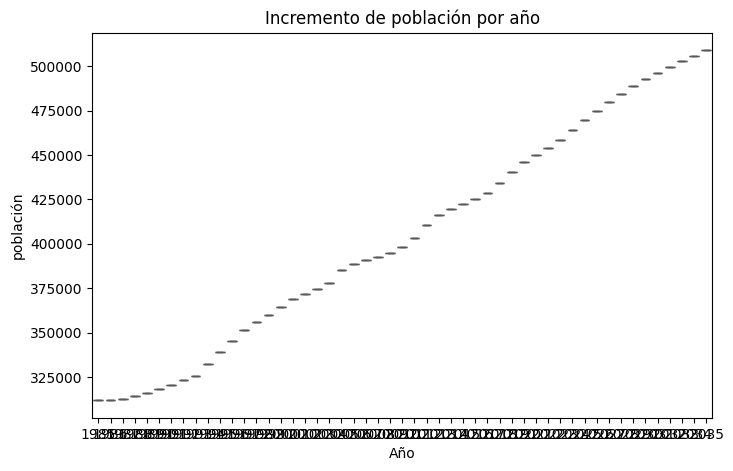

In [ ]:
#Diagrama de la población a medida de los años

plt.figure(figsize=(8,5))
sns.boxplot(x='Año',y='Población Total',data=demografico,palette= 'Set2')
plt.title("Incremento de población por año")
plt.xlabel("Año")
plt.ylabel("población")
plt.show()